# Four components of Machine Learning: 

    - Dataset 
    - model
    - cost function
    - learning algorithm (optimization)

# Linear Regression
Linear Regression is usually the first machine learning algorithm that every data scientist comes across. It is a simple model but everyone needs to master it as it lays the foundation for other machine learning algorithms.

<img src='./images/linear_1.png' width="500">

In [ ]:
y = ax + b

###  Where can Linear Regression be used?

It is a very powerful technique and can be used to understand the factors that influence profitability. It can be used to forecast sales in the coming months by analyzing the sales data for previous months. It can also be used to gain various insights about customer behaviour. By the end of the blog we will build a model which looks like the below picture i.e, determine a line which best fits the data.

### Table of Contents

    - What is Linear Regression
    - Hypothesis of Linear Regression
    - Training a Linear Regression model
    - Evaluating the model
    - scikit-learn implementation

### What is Linear Regression

The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). When there is only feature it is called Uni-variate Linear Regression and if there are multiple features, it is called Multiple Linear Regression.

### Hypothesis of Linear Regression

The linear regression model can be represented by the following equation: 

$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$ 

 - y is the predicted value
 - $\theta_0, \theta_1, \theta_2, ... \theta_n$ are the model parameters ($\theta_0$ is also called the bias)
 - $x_1, x_2, ..., x_n$ are feature values

The above equation could also be compactly represented by ($x_0 = 1$):

$y = \theta^Tx $


### Dataset
Let’s create some random data-set to train our model.

Text(0, 0.5, 'y')

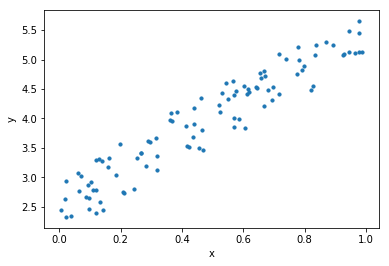

In [24]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')

### Training a Linear Regression Model
Training of the model here means to find the parameters so that the model best fits the data.

#### How do we determine the best fit line?

The line for which the the error between the predicted values and the observed values is minimum is called the best fit line or the regression line. These errors are also called as residuals. The residuals can be visualized by the vertical lines from the observed data value to the regression line.

<img src='./images/linear_2.png' width="500">
[image source] http://wiki.engageeducation.org.au/further-maths/data-analysis/residuals/

To define and measure the error of our model we define the **cost function** as the sum of the squares of the residuals. The cost function is denoted by: 

###  $J(\theta) = \frac{1}{2N}\sum\limits_{i=1}^N(h(x^i) - y^i)^2$

where the hypothesis function $h(x)$ is denoted by:
$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$  and N is the total number of training examples in our data-set.

*Why do we take the square of the residuals and not the absolute value of the residuals ? We want to penalize the points which are farther from the regression line much more than the points which lie close to the line.*

**Our objective** is to find the model parameters so that the cost function is minimum. We will use Gradient Descent to find this.

### Gradient Descent (optional)

Gradient descent is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function. The steps of gradient descent is outlined below.

1. We first initialize the model parameters with some random values. This is also called as random initialization.
2. Now we need to measure how the cost function changes with change in it’s parameters. Therefore we compute the partial derivatives of the cost function w.r.t to the parameters $\theta_0, \theta_1, ... \theta_n$

    $\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{N}\sum\limits_{i=1}^N(h(x^i) - y^i)$

    $\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{N}\sum\limits_{i=1}^N(h(x^i) - y^i)x_1^i$

    similarly, the partial derivative of the cost function w.r.t to any parameter can be denoted by

    $\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{N}\sum\limits_{i=1}^N(h(x^i) - y^i)x_j^i$
    
3. After computing the derivative we update the parameters as given below

    $\theta_0 = \theta_0 - \frac{\alpha}{N}\sum\limits_{i=1}^N(h(x^i) - y^i)$
    
    $\theta_1 = \theta_1 - \frac{\alpha}{N}\sum\limits_{i=1}^N(h(x^i) - y^i)x_1^i$
    
    .
    .
    .
    
    where $\alpha$ is the learning rate
    

    
    

We repeat the steps 2,3 until the cost function converges to the minimum value. If the value of α is too small, the cost function takes larger time to converge. If α is too large, gradient descent may overshoot the minimum and may finally fail to converge.

<img src='./images/linear_3.png' width="500">
[image source] Andrew Ng’s course on Coursera

To demonstrate the gradient descent algorithm, we initialize the model parameters with 0. The equation becomes Y = 0. Gradient descent algorithm now tries to update the value of the parameters so that we arrive at the best fit line.

When the learning rate is very slow, the gradient descent takes larger time to find the best fit line.

<img src='./images/linear_4.gif' width="500">

When the learning rate is normal

<img src='./images/linear_5.gif' width="500">

When the learning rate is arbitrarily high, gradient descent algorithm keeps overshooting the best fit line and may even fail to find the best line.

<img src='./images/linear_6.gif' width="500">

### Implementing Linear Regression from scratch (optional)

The complete implementation of linear regression with gradient descent is given below.

In [19]:
# imports
import numpy as np

class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_)

The model parameters are given below:

> The coefficient is [2.89114079]

> The intercept is [2.58109277]

The plot of the best fit line

<img src='./images/linear_7.png' width="500">

The plot of the cost function vs the number of iterations is given below. We can observe that the cost function decreases with each iteration initially and finally converges after nearly 100 iterations.

<img src='./images/linear_8.png' width="500">

Till now we have implemented linear regression from scratch and used gradient descent to find the model parameters. But how good is our model? We need some measure to calculate the accuracy of our model. Let’s look at various metrics to evaluate the model we built above.

### Evaluating the performance of the model

We will be using Root mean squared error(RMSE) and Coefficient of Determination($R^2$  score) to evaluate our model.

RMSE is the square root of the average of the sum of the squares of residuals.

RMSE is defined by

$RMSE = \sqrt{\frac{1}{N}\sum\limits_{i=1}^N(h(x^i) - y^i)^2}$

$R^2$  score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression.

$R^2$ is determined by

$R^2 = 1 - \frac{SS_r}{SS_T}$

$SS_t$ is the total sum of errors if we take the mean of the observed values as the predicted value. 

$SS_t = \sum\limits_{i=1}^N(y^i - E(y))^2$ 

$SS_r$ is the sum of the square of residuals

$SS_r = \sum\limits_{i=1}^N(h(x^i) - y^i)^2$

In [20]:
# mse = np.sum((y_pred - y_actual)**2)

# # root mean squared error
# # m is the number of training examples
# rmse = np.sqrt(mse/m)

### Scikit-learn implementation

sckit-learn is a very powerful library for data-science. The complete code is given below

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875009
R2 score:  0.9038655568672764


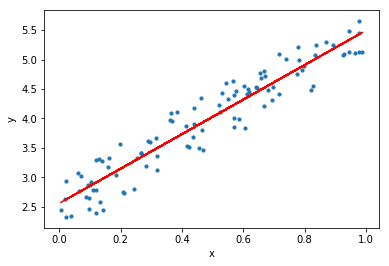

In [21]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')